In [69]:
import random as rd
import numpy as np
from itertools import product
M2_S = np.zeros((10,10))
for i,j in product (range(0,10),range(0,10)):
    if (i==j):
        M2_S[i][j] = 1.0
    else:
        if (i>j):
            M2_S[i][j] = rd.uniform(-1.0,1.0)
            M2_S[j][i] = M2_S[i][j]



In [ ]:
k = 0.03
sigma = 0.1
from math import sin
change = []
for i in range (0,100):
    change.append(sin(k*i))
M2_A = np.zeros((100,100,61,500))
for i,j,k,l in product (range(0,100), range(0,100), range(0,61), range(0,500)):
    M2_A[i][j][k][l] = np.random.normal(M2_S[i/10][j/10]+change[k],sigma,1)
    if (abs(M2_A[i][j][k][l])>=1):
        M2_A[i][j][k][l]=2-M2_A[i][j][k][l]


In [2]:
k = 0.03
sigma = 0.1
from math import sin
change = []
for i in range (0,100):
    change.append(k*sin(i))
sample = np.zeros((100,100,61))
for i in range (0,100):
    for j in range (0,i+1):
        for k in range (0,61):
            if (i==j):
                sample[i][j][k]=1.0
            else:
                if (i>j):
                    x=np.random.normal(M2_S[i/10][j/10]+change[k], sigma, 1)
                    if (x>=1):
                        x=2-x
                    sample[j][i][k]=sample[i][j][k]=x

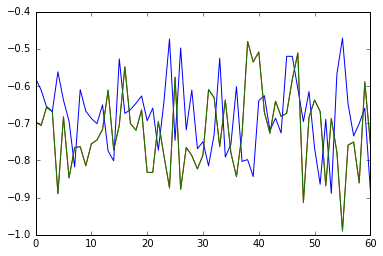

In [3]:
%matplotlib inline
a = []
b = []
c = []
for i in range (0,61):
    a.append(sample[13][94][i])
    b.append(sample[10][97][i])
    c.append(sample[97][10][i])
    

import matplotlib
import matplotlib.pyplot as plt
plt.plot(b, 'r', a, 'b', c, 'g')
plt.show()

In [70]:
k = 0.03
sigma = 0.1
from math import sin
change = []
for i in range (0,61):
    change.append(k*sin(i))
N_samples = 500
M2_A = np.zeros((2,N_samples,100,100))
for l in range (0,N_samples):
    for i in range (0,100):
        for j in range (0,i+1):
            if (i==j):
                M2_A[0][l][i][j] = 1.0
                M2_A[1][l][i][j] = 1.0
            else:
                for k in range (0,60):
                    x=np.random.normal(M2_S[i/10][j/10]+change[k], sigma, 1)
                    if (x>=1):
                        x=2-x
                    M2_A[0][l][i][j]+=x/60
                M2_A[0][l][j][i]=M2_A[0][l][i][j]
                x = np.random.normal(M2_S[i/10][j/10]+change[60],sigma,1)
                if (x>=1):
                    x = 2-x
                M2_A[1][l][i][j] = M2_A[1][l][j][i] = x                

In [71]:
ro = np.random.uniform(-1.0,1.0)
M3_A = np.zeros((2, N_samples, 100, 100))
for l in range (0, N_samples):
    for i in range (0, 100):
        for j in range (0, i+1):
            if (i==j):
                M3_A[0][l][i][j] = 1.0
                M3_A[1][l][i][j] = 1.0
            else:
                for k in range (0,60):
                    x=np.random.normal(ro+change[k], sigma, 1)
                    if (x>=1):
                        x=2-x
                    M3_A[0][l][i][j]+=x/60
                M3_A[0][l][j][i] = M3_A[0][l][i][j]
                x = np.random.normal(ro+change[60], sigma, 1)
                if (x>=1):
                    x = 2 - x
                M3_A[1][l][j][i] = M3_A[1][l][i][j] = x

In [72]:
M1_A = np.zeros((2, N_samples, 100, 100))
for l in range (0, N_samples):
    for i in range (0, 100):
        for j in range (0, i+1):
            if (i==j):
                M1_A[0][l][i][j] = M1_A[1][l][i][j] = 1.0
            else:
                for k in range (0, 60):
                    x = np.random.normal(1+change[k], sigma, 1)
                    if (x>=1):
                        x = 2-x
                    M1_A[0][l][i][j]+=x/60
                M1_A[0][l][j][i] = M1_A[0][l][i][j]
                x = np.random.normal(1+change[60], sigma, 1)
                if (x>=1):
                    x = 2-x
                M1_A[1][l][i][j] = M1_A[1][l][j][i] = x

In [73]:
def fourDtomatrix(M,l):
    a = np.zeros((100,100))
    for (i,j) in product (range(0,100), range(0,100)):
        a[i][j] = M[0][l][i][j]
    return a
    

In [74]:
def weights(matrix, number_of_weights):
    a = np.linalg.inv(matrix)
    w = np.zeros(number_of_weights)
    c = 0
    for i in range (0, number_of_weights):
        for j in range (0, number_of_weights):
            w[i] += a[i][j]
        c += w[i]
    for i in range (0, number_of_weights):
        w[i] = w[i]/c
    return w
        
    

In [75]:
def model(x):
    M = np.zeros((2, N_samples, 100, 100))
    M = x[0]*M1_A + x[1]*M2_A + (1-x[0]-x[1])*M3_A
    r = 0
    for l in range(0, N_samples):
        a = fourDtomatrix(M,l)
        w = weights(a, 100)
        for (i,j) in product(range(0,100), range(0,100)):
            r+=w[i]*w[j]*M[1][l][i][j]
    return r
        
    
    

In [79]:
from scipy import optimize
x0 = [0.2, 0.1]
cons = ({'type': 'ineq', 'fun': lambda x: x[0]},
       {'type': 'ineq', 'fun': lambda x: x[1]},
       {'type': 'ineq', 'fun': lambda x: 1-x[0]-x[1]})
res = optimize.minimize(model, x0, method='COBYLA',
                       constraints=cons,
                       options={'maxiter': 10000})
print res

     fun: 10707.040742884798
   maxcv: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 32
  status: 1
 success: True
       x: array([ 0.63616501,  0.36369895])


In [80]:
print model(x0)

452.6446519


In [89]:
print model([0.63616501, 0.36369895])

10679.7469647


In [82]:
print model([0.5, 0.4])

2466.99705125


In [83]:
print model([0.1, 0.1])

-38957.7004055


In [84]:
def model2(x):
    M = np.zeros((2, N_samples, 100, 100))
    M = x[0]*M1_A + x[1]*M2_A + (1-x[0]-x[1])*M3_A
    r = 0
    for l in range(0, N_samples):
        a = fourDtomatrix(M,l)
        w = weights(a, 100)
        for i in range(0,100):
            r+=w[i]*w[i]
    return r

In [85]:
from scipy import optimize
x0 = [0.2, 0.1]
cons = ({'type': 'ineq', 'fun': lambda x: x[0]},
       {'type': 'ineq', 'fun': lambda x: x[1]},
       {'type': 'ineq', 'fun': lambda x: 1-x[0]-x[1]})
res = optimize.minimize(model2, x0, method='COBYLA',
                       constraints=cons,
                       options={'maxiter': 10000})
print res

     fun: 5.4942537025972129
   maxcv: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 70
  status: 1
 success: True
       x: array([ 0.33513278,  0.00034398])
